# AI: Logistic Regression

## Classification problem with LR: should we give a loan or no?

In this project I use my own designed Logistic Regression and DataTable packages to predict if a person with respective attributes will pay loan back.

I'll walk you through this process of model definition, fine-tuning and evaluation. You might want to jump to the interesting section immediately.

Before exploring Logistic Regression, I would recommend to start with Regression at first here: https://github.com/kotsky/ai-dev/blob/main/regression_workflow.ipynb, because this work is Regression extension and was done in short.


1. [Section 1](#id_1)- preparation
2. [Section 2](#id_2)- model building
3. [Section 3](#id_3)- training
4. [Section 4](#id_4)- evaluation
5. [Section 5](#id_5)- results


# Introduction
I had developed my own Pandas-like simplified package data_reader.py to fetch different kind of data faster than Pandas can do and contains main features for Logistic Regression AI like data preparation for training/testing, split data, adding new features, creating combined one, ploting and many others. 

In addition, to enhance my AI regression model's knowledge, I designed a logistic_regression.py package based on sigmoid activator, gradient descent technique to traing a (linear, non-linear, multi-variable) regression model with a various model parameters like number of iterations (epoch), learning rate (alpha) and regularization coefficient (regul). Moreover there is logs feature to monitor regression model learning and evaluation of its performance. 

All these features and techniques I would like to show in this notebook.

For additional package usage, refer to doxy in its src code.

For that session, I'm going to use a /data/loan_train.csv file, which contains table-like structure data of various cases when a person returns/not returns his loan back. It might be interesting to try to predict if the given person can get loan.

# Section 1<a id='id_1'></a> - preparation

In [1]:
import classification.logistic_regression as lr
import data_reader as dr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from helper_methods import *

In [2]:
main_data = dr.DataTable("data/loan_train.csv")

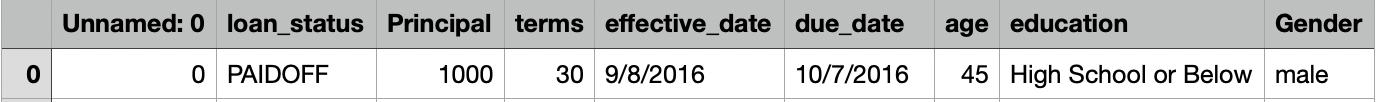

In [3]:
main_data.head

['',
 'Unnamed: 0',
 'loan_status',
 'Principal',
 'terms',
 'effective_date',
 'due_date',
 'age',
 'education',
 'Gender']

Loan_status is going to be our target which we try to predict. It has 2 options: PAIDOFF and COLLECTION. DataTable helps to read csv file in a way that words (as a string data type) will be converted to numbers, which we can easily restore back.

In [4]:
target_name = "loan_status"
main_data.select_target(target_name)
main_data.target[target_name].data[0:5]

Target loan_status was added


[1, 1, 1, 1, 1]

In [5]:
main_data.class_dict[target_name]  # to check which number represent which word

[{'_count': 2, 'COLLECTION': 0, 'PAIDOFF': 1}, {0: 'COLLECTION', 1: 'PAIDOFF'}]

So, COLLECTION is 0, and PAIDOFF is 1. With that, let's move further. What about features?

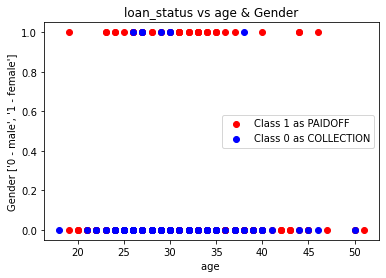

In [6]:
main_data.plot(parameter1='age', parameter2='Gender', classifier=target_name)

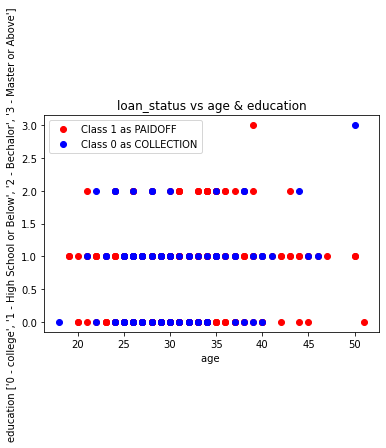

In [7]:
main_data.plot(parameter1='age', parameter2='education', classifier=target_name)

From the picture above we can see an interesting relationship betwee education and age. It make sense to create a new feature education * age.

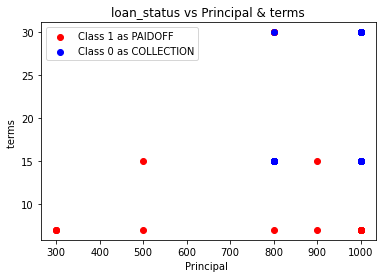

In [8]:
main_data.plot(parameter1='Principal', parameter2='terms', classifier=target_name)

Well, we can see that we don't have strongly marked relationship between features and target. Might be hard to predict with hight accurace loan returning. But we will try.

# Section 2<a id='id_2'></a> - model building

In [9]:
main_data.activate_features(['Principal',
 'terms',
 'effective_date',
 'age',
 'education',
 'Gender'])

Feature Principal was added
Feature terms was added
Feature effective_date was added
Feature age was added
Feature education was added
Feature Gender was added


In [10]:
main_data.add_new_feature(['education', 'age'])

New created feature education*age was added
This education*age feature is added to the list of training set


In [11]:
main_data.add_new_feature(['Gender', 'age'])

New created feature Gender*age was added
This Gender*age feature is added to the list of training set


In [12]:
main_data.max_scaling()

Column  was scaled
Column Unnamed: 0 was scaled
Column loan_status was scaled
Column Principal was scaled
Column terms was scaled
Column effective_date was scaled
Column due_date was scaled
Column age was scaled
Column education was scaled
Column Gender was scaled
Column education*age was scaled
Column Gender*age was scaled


In [13]:
main_data.split_data(0.6, shuffle=True)

Shuffle was done
Data was split as follows: 0.6 training set and 0.4 testing set


In [14]:
training_data = main_data.get_training_data()  # returns (features data, target data)
# cv_data = main_data.get_cv_data()
testing_data = main_data.get_testing_data()

In [15]:
model_1 = lr.LogisticRegression()

In [16]:
model_1.set_training_data(training_data[0], training_data[1])
model_1.set_testing_data(testing_data[0], testing_data[1])

True

# Section 3<a id='id_3'></a> - training

In [17]:
model_1.RANDOM_WEIGHT_INITIALIZATION = 10

In [18]:
model_1.epoch = 2000
model_1.alpha = 0.3
model_1.regularization = 0.1

In [19]:
model_1.fit(scaled_coefficients=True)

Initiated coefficients are [-0.6, -0.8, -0.4, -0.4, -0.3, -0.3, 1.0, 0.8, -0.9]
Iteration 501 done
Iteration 1001 done
Iteration 1501 done
Training is completed with 2000 iterations


[0.22, -0.07, 0.12, -0.17, 0.13, -0.14, 0.29, 1.22, -0.46]

# Section 4<a id='id_4'></a> - evaluation

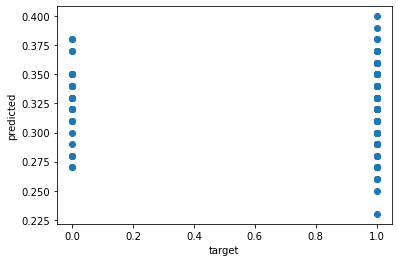

In [20]:
predicted = []
test_features, test_target = testing_data
for idx in range(len(test_features)):
    feature_line = test_features[idx]
    predicted.append(model_1.predict(feature_line, raw_output=True))
    

# plt.scatter(axis1, testing_target, label="Target")
plt.scatter(test_target, predicted)
# plt.legend(loc=loc_place)
plt.xlabel("target")
plt.ylabel("predicted")
plt.show()


Indeed, 0 and 1 are mixed up, so it's going to be hard to predict properly. Let's set logistic threshold to 0.325 as a middle of our plot and check via confusion matrix its error outcome.

In [23]:
model_1.logistic_threshold = 0.27
cm, precision, recall = model_1.evaluation(testing_data, metric="confusion_matrix")
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])

In [26]:
print("Confusion matrix {}".format(matrix))
print("Precision is {} and recall is {}".format(precision, recall))
print("Accuracy is", accuracy)

Confusion matrix [[0.71, 0.25], [0.04, 0.0]]
Precision is 0.7368421052631579 and recall is 0.9514563106796117
Accuracy is 0.71


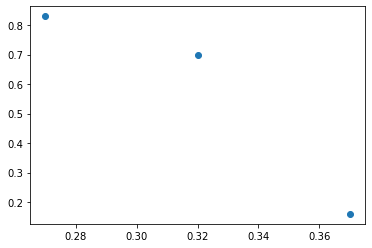

In [21]:
def f1_score(precision, recall):
    return round((2 * precision * recall / (precision + recall)), 2)

start = 0.27
step = 0.05
end = 0.38

axis_x = []
axis_y = []

while end > start:
    model_1.logistic_threshold = start
    matrix, precision, recall = model_1.evaluation(testing_data, metric="confusion_matrix")
    axis_x.append(start)
    start += step
    axis_y.append(f1_score(precision, recall))
    
plt.scatter(axis_x, axis_y)
plt.show()


# Section 5<a id='id_5'></a> - results

Based on evaluation output above, we predicted with 71% accuracy that given people from a test data set will or not return loan taken before.

f1 score showed the best logistic threshold at 0.27, which we used to find out the best precision 74% and recall 95%.